## 过拟合与欠拟合

### 获取并绘制数据集


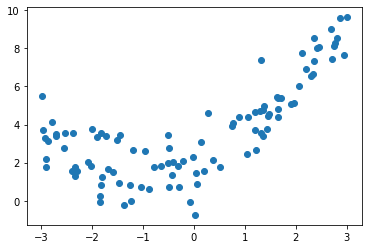

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

使用线性回归拟合数据

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# 输出：0.4953707811865009

0.4953707811865009

准确率为 0.495，比较低，直线拟合数据的程度较低。

### 使用均方误差判断拟合程度

In [3]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)
# 输出：3.0750025765636577

3.0750025765636577

### 绘制拟合结果

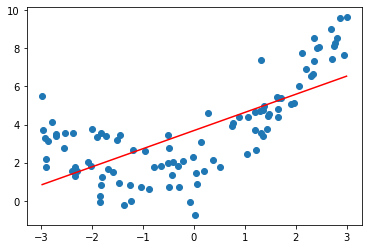

In [4]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

### 使用多项式回归拟合

* 封装 Pipeline 管道

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

* 使用 Pipeline 拟合数据：degree = 2

In [6]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

y2_predict = poly2_reg.predict(X)

# 比较真值和预测值的均方误差
mean_squared_error(y, y2_predict)
# 输出：1.0987392142417856

1.0987392142417856

* 绘制拟合结果

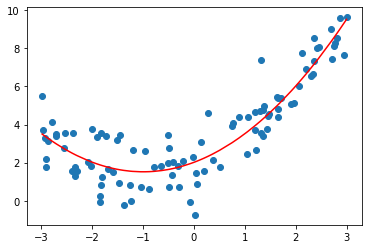

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

* 调整 degree = 10

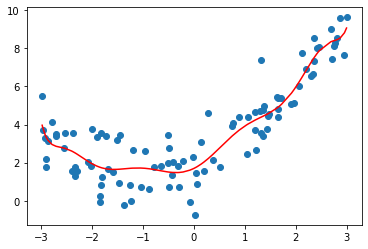

In [8]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)
# 输出：1.0508466763764164


plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

* 调整 degree = 100


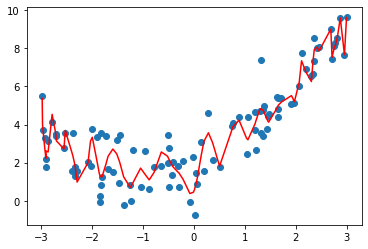

In [9]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)
# 输出：0.6874357783433694


plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

* 分析
    1. degree=2：均方误差为 1.0987392142417856；
    2. degree=10：均方误差为 1.0508466763764164；
    3. degree=100：均方误差为 0.6874357783433694；
    4. degree 越大拟合的效果越好，因为样本点是一定的，我们总能找到一条曲线将所有的样本点拟合，也就是说将所有的样本点都完全落在这根曲线上，使得整体的均方误差为 0；
    5. 红色曲线并不是所计算出的拟合曲线，而此红色曲线只是原有的数据点对应的 y 的预测值连接出来的结果，而且有的地方没有数据点，因此连接的结果和原来的曲线不一样；

## 交叉验证

### 交叉验证迭代器

**K折交叉验证**： KFold 将所有的样例划分为 k 个组，称为折叠 (fold) （如果 k = n， 这等价于 Leave One Out（留一） 策略），都具有相同的大小（如果可能）。预测函数学习时使用 k - 1 个折叠中的数据，最后一个剩下的折叠会用于测试。

**K折重复多次**： RepeatedKFold 重复 K-Fold n 次。当需要运行时可以使用它 KFold n 次，在每次重复中产生不同的分割。

**留一交叉验证**： LeaveOneOut (或 LOO) 是一个简单的交叉验证。每个学习集都是通过除了一个样本以外的所有样本创建的，测试集是被留下的样本。 因此，对于 n 个样本，我们有 n 个不同的训练集和 n 个不同的测试集。这种交叉验证程序不会浪费太多数据，因为只有一个样本是从训练集中删除掉的:

**留P交叉验证**： LeavePOut 与 LeaveOneOut 非常相似，因为它通过从整个集合中删除 p 个样本来创建所有可能的 训练/测试集。对于 n 个样本，这产生了 {n \choose p} 个 训练-测试 对。与 LeaveOneOut 和 KFold 不同，当 p > 1 时，测试集会重叠。

**用户自定义数据集划分： ShuffleSplit** 迭代器将会生成一个用户给定数量的独立的训练/测试数据划分。样例首先被打散然后划分为一对训练测试集合。

**设置每次生成的随机数相同**： 可以通过设定明确的 random_state ，使得伪随机生成器的结果可以重复。

### 基于类标签、具有分层的交叉验证迭代器

如何解决样本不平衡问题？ 使用StratifiedKFold和StratifiedShuffleSplit 分层抽样。 一些分类问题在目标类别的分布上可能表现出很大的不平衡性：例如，可能会出现比正样本多数倍的负样本。在这种情况下，建议采用如 StratifiedKFold 和 StratifiedShuffleSplit 中实现的分层抽样方法，确保相对的类别频率在每个训练和验证 折叠 中大致保留。

**StratifiedKFold**是 k-fold 的变种，会返回 stratified（分层） 的折叠：每个小集合中， 各个类别的样例比例大致和完整数据集中相同。

**StratifiedShuffleSplit**是 ShuffleSplit 的一个变种，会返回直接的划分，比如： 创建一个划分，但是划分中每个类的比例和完整数据集中的相同。

### 用于分组数据的交叉验证迭代器

如何进一步测试模型的泛化能力？ 留出一组特定的不属于测试集和训练集的数据。有时我们想知道在一组特定的 groups 上训练的模型是否能很好地适用于看不见的 group 。为了衡量这一点，我们需要确保验证对象中的所有样本来自配对训练折叠中完全没有表示的组。

**GroupKFold**是 k-fold 的变体，它确保同一个 group 在测试和训练集中都不被表示。 例如，如果数据是从不同的 subjects 获得的，每个 subject 有多个样本，并且如果模型足够灵活以高度人物指定的特征中学习，则可能无法推广到新的 subject 。 GroupKFold 可以检测到这种过拟合的情况。

**LeaveOneGroupOut**是一个交叉验证方案，它根据第三方提供的 array of integer groups （整数组的数组）来提供样本。这个组信息可以用来编码任意域特定的预定义交叉验证折叠。

每个训练集都是由除特定组别以外的所有样本构成的。

**LeavePGroupsOut**类似于 LeaveOneGroupOut ，但为每个训练/测试集删除与 P 组有关的样本。

**GroupShuffleSplit**迭代器是 ShuffleSplit 和 LeavePGroupsOut 的组合，它生成一个随机划分分区的序列，其中为每个分组提供了一个组子集。

### 时间序列分割

**TimeSeriesSplit**是 k-fold 的一个变体，它首先返回 k 折作为训练数据集，并且 (k+1) 折作为测试数据集。 请注意，与标准的交叉验证方法不同，连续的训练集是超越前者的超集。 另外，它将所有的剩余数据添加到第一个训练分区，它总是用来训练模型。


In [10]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割
from sklearn.model_selection import TimeSeriesSplit # 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

iris = datasets.load_iris()  # 加载数据集
print('样本集大小：',iris.data.shape,iris.target.shape)

# ===================================数据集划分,训练模型==========================
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',X_train.shape,y_train.shape)  # 训练集样本大小
print('测试集大小：',X_test.shape,y_test.shape)  # 测试集样本大小
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # 使用训练集训练模型
print('准确率：',clf.score(X_test, y_test))  # 计算测试集的度量值（准确率）


#  如果涉及到归一化，则在测试集上也要使用训练集模型提取的归一化函数。
scaler = preprocessing.StandardScaler().fit(X_train)  # 通过训练集获得归一化函数模型。（也就是先减几，再除以几的函数）。在训练集和测试集上都使用这个归一化函数
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(kernel='linear', C=1).fit(X_train_transformed, y_train) # 使用训练集训练模型
X_test_transformed = scaler.transform(X_test)
print(clf.score(X_test_transformed, y_test))  # 计算测试集的度量值（准确度）

# ===================================直接调用交叉验证评估模型==========================
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

# ===================================多种度量结果======================================
scoring = ['precision_macro', 'recall_macro'] # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)  # scores类型为字典。包含训练得分，拟合次数， score-times （得分次数）


# ==================================K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证==========================================
# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(iris.data):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(iris.data):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(iris.data):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(iris.data):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# ==================================分层K折交叉验证、分层随机交叉验证==========================================
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(iris.data, iris.target):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(iris.data, iris.target):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break


# ==================================组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split==========================================
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))


# ==================================时间序列分割==========================================
tscv = TimeSeriesSplit(n_splits=3)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(iris.data):
    print("时间序列分割：%s %s" % (train, test))

样本集大小： (150, 4) (150,)
训练集大小： (90, 4) (90,)
测试集大小： (60, 4) (60,)
准确率： 0.9666666666666667
0.9333333333333333
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)
测试结果： {'fit_time': array([0.        , 0.        , 0.00097084, 0.        , 0.00099993]), 'score_time': array([0.00099754, 0.00099993, 0.        , 0.00099993, 0.        ]), 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]), 'train_precision_macro': array([0.97674419, 0.97674419, 0.99186992, 0.98412698, 0.98333333]), 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]), 'train_recall_macro': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])}
k折划分：(75,) (75,)
留一划分：(149,) (1,)
留p划分：(149,) (1,)
随机排列划分：(149,) (1,)
分层K折划分：(100,) (50,)
分层随机划分：(135,) (15,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[0 1 2 6 7 8 9] [3 

## 网格搜索

Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找最大值。

### 简单的网格搜索

In [11]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


### Grid Search with Cross Validation


In [12]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state=1)
print("Size of training set:{} size of validation set:{} size of testing set:{}".format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
svm = SVC(**best_parameters) #使用最佳参数，构建新的模型
svm.fit(X_trainval,y_trainval) #使用训练集和验证集进行训练，more data always results in good performance.
test_score = svm.score(X_test,y_test) # evaluation模型评估
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.2f}".format(test_score))

Size of training set:84 size of validation set:28 size of testing set:38
Best score on validation set:0.96
Best parameters:{'gamma': 0.001, 'C': 10}
Best score on test set:0.92


In [13]:
from sklearn.model_selection import cross_val_score

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5) #5折交叉验证
        score = scores.mean() #取平均数
        if score > best_score:
            best_score = score
            best_parameters = {"gamma":gamma,"C":C}
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Score on testing set:{:.2f}".format(test_score))

Best score on validation set:0.97
Best parameters:{'gamma': 0.1, 'C': 10}
Score on testing set:0.97


交叉验证经常与网格搜索进行结合，作为参数评价的一种方法，这种方法叫做grid search with cross validation。sklearn因此设计了一个这样的类GridSearchCV，这个类实现了fit，predict，score等方法，被当做了一个estimator，使用fit方法，该过程中：（1）搜索到最佳参数；（2）实例化了一个最佳参数的estimator；

In [14]:
from sklearn.model_selection import GridSearchCV

#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=10)
grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.97
Best parameters:{'C': 10, 'gamma': 0.1}
Best score on train set:0.98


## 学习曲线和验证曲线

### 学习曲线

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

<module 'matplotlib.pyplot' from 'C:\\dev\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

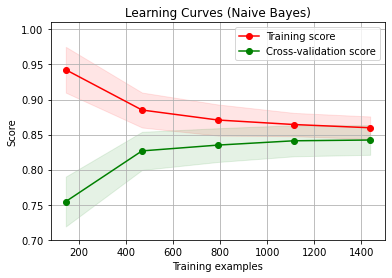

In [17]:
digits = load_digits()
X, y = digits.data, digits.target

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv)

<module 'matplotlib.pyplot' from 'C:\\dev\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

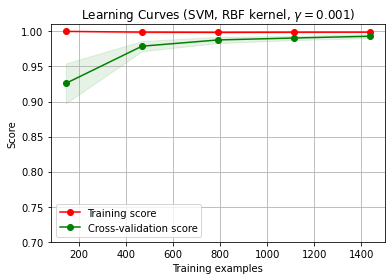

In [18]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv)

### 验证曲线

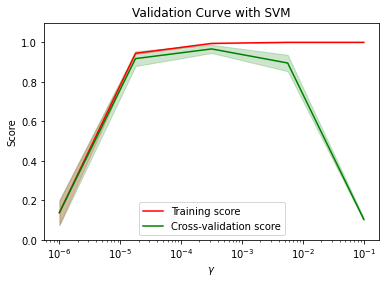

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn. model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

## 工业蒸汽赛题模型验证

### 模型过拟合与欠拟合

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.linear_model import SGDRegressor

In [21]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [22]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [23]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [24]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

### 欠拟合

In [25]:
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.15155433720346087
SGDRegressor test MSE:    0.15591496754140155


### 过拟合

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13252126908067807
SGDRegressor test MSE:    0.14508996998555238


### 正常拟合

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13404470027269183
SGDRegressor test MSE:    0.1426608237136458


### 模型正则化

**L2范数正则化**

In [28]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13416089018800764
SGDRegressor test MSE:    0.14249318498545374


**L1范数正则化**

In [29]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13419034585090475
SGDRegressor test MSE:    0.14247031463314352


**ElasticNet L1和L2范数加权正则化**

In [30]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13429653315836274
SGDRegressor test MSE:    0.1427071927313498


### 模型交叉验证

**简单交叉验证 Hold-out-menthod**

In [31]:
# 简单交叉验证
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14155695890849593
SGDRegressor test MSE:    0.14697092876204476


**K折交叉验证 K-fold CV**

In [32]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')  

0  折 SGDRegressor train MSE:    0.15073256743766314
0  折 SGDRegressor test MSE:    0.10628696630886698 

1  折 SGDRegressor train MSE:    0.1335792531319924
1  折 SGDRegressor test MSE:    0.18248904818372758 

2  折 SGDRegressor train MSE:    0.1473401309225432
2  折 SGDRegressor test MSE:    0.13371862016177813 

3  折 SGDRegressor train MSE:    0.14076877060868934
3  折 SGDRegressor test MSE:    0.16331908673887274 

4  折 SGDRegressor train MSE:    0.13805490974185386
4  折 SGDRegressor test MSE:    0.16464790842485935 



**留一法 LOO CV**

In [33]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.14152385884541316
0  个 SGDRegressor test MSE:    0.011224183439780364 

1  个 SGDRegressor train MSE:    0.14161179184791836
1  个 SGDRegressor test MSE:    0.12096565156595619 

2  个 SGDRegressor train MSE:    0.14166573026718857
2  个 SGDRegressor test MSE:    0.039258675762521206 

3  个 SGDRegressor train MSE:    0.14148626387123292
3  个 SGDRegressor test MSE:    0.003693390453113802 

4  个 SGDRegressor train MSE:    0.14166476031973635
4  个 SGDRegressor test MSE:    0.012044603639479512 

5  个 SGDRegressor train MSE:    0.14180093765101118
5  个 SGDRegressor test MSE:    0.12982596963901405 

6  个 SGDRegressor train MSE:    0.14098625222978745
6  个 SGDRegressor test MSE:    0.028875605271309942 

7  个 SGDRegressor train MSE:    0.14171242470763057
7  个 SGDRegressor test MSE:    0.0006195683022511509 

8  个 SGDRegressor train MSE:    0.1415796509554305
8  个 SGDRegressor test MSE:    0.09042015566193218 

9  个 SGDRegressor train MSE:    0.141570339444156

**留P法 LPO CV**

In [34]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.141947065784068
0  10个 SGDRegressor test MSE:    0.04909762312870013 

1  10个 SGDRegressor train MSE:    0.14125134942821285
1  10个 SGDRegressor test MSE:    0.04383498992313524 

2  10个 SGDRegressor train MSE:    0.14128148206666352
2  10个 SGDRegressor test MSE:    0.04559257315651562 

3  10个 SGDRegressor train MSE:    0.1419153391137868
3  10个 SGDRegressor test MSE:    0.054371519568048046 

4  10个 SGDRegressor train MSE:    0.14179324406490063
4  10个 SGDRegressor test MSE:    0.06930575098943444 

5  10个 SGDRegressor train MSE:    0.1420388051765967
5  10个 SGDRegressor test MSE:    0.04473013453148684 

6  10个 SGDRegressor train MSE:    0.1420083989793697
6  10个 SGDRegressor test MSE:    0.04955741316408875 

7  10个 SGDRegressor train MSE:    0.14133863853681589
7  10个 SGDRegressor test MSE:    0.05237622194752635 

8  10个 SGDRegressor train MSE:    0.14206452821400045
8  10个 SGDRegressor test MSE:    0.046730029842391815 

9  10个 SGDRegressor tr

### 模型超参空间及调参

**穷举网格搜索**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }

clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.25672921582468633


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**随机参数优化**

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
          'n_estimators':[50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5]
        }

clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19604969454835267


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**Lgb 调参**

In [37]:
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.1521621166592498


**Lgb 线下验证**

In [38]:
train_data2 = pd.read_csv('./zhengqi_train.txt',sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt',sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

In [40]:
# lgb 模型
from sklearn.model_selection  import KFold
import lightgbm as lgb
import numpy as np


# 5折交叉验证
Folds=5
kf = KFold(len(train_data2_f), random_state=100, shuffle=True)
# 记录训练和预测MSE
MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=100,
        boosting_type='gbdt',
        random_state=100,
        objective='regression',
    )
   
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    
    # 训练模型
#     reg.fit(X_train_KFold, y_train_KFold)
    lgb_reg.fit(
            X=X_train_KFold,y=y_train_KFold,
            eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names=['Train','Test'],
            early_stopping_rounds=100,
            eval_metric='MSE',
            verbose=50
        )


    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

[50]	Train's l2: 0.433641	Test's l2: 1.26094
[100]	Train's l2: 0.225389	Test's l2: 0.395946
第0折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2253894593907278 
------
------
 预测MSE
 0.39594615791032484 
------

[50]	Train's l2: 0.434194	Test's l2: 0.21387
[100]	Train's l2: 0.225623	Test's l2: 0.142998
第1折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562318918023602 
------
------
 预测MSE
 0.14299832987129202 
------

[50]	Train's l2: 0.43384	Test's l2: 1.22148
[100]	Train's l2: 0.225411	Test's l2: 0.903757
第2折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22541141133044326 
------
------
 预测MSE
 0.9037572765138073 
------

[50]	Train's l2: 0.434124	Test's l2: 0.311844
[100]	Train's l2: 0.22575	Test's l2: 0.0761824
第3折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574960076094844 
------
------
 预测MSE
 0.07618242987692267 
------

[50]	Train's l2: 0.434074	Test's l2: 0.0185789
[100]	Train's l2: 0.22568	Test's l2: 0.0183695
第4折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568038969308618 
------
------
 预测MSE
 0.018369536232779236 
--

[50]	Train's l2: 0.434197	Test's l2: 0.0203651
[100]	Train's l2: 0.225683	Test's l2: 0.002867
第41折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225682965978956 
------
------
 预测MSE
 0.002866998019767275 
------

[50]	Train's l2: 0.434126	Test's l2: 0.494415
[100]	Train's l2: 0.225658	Test's l2: 0.239639
第42折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565794860266372 
------
------
 预测MSE
 0.23963857374630626 
------

[50]	Train's l2: 0.4342	Test's l2: 0.00714261
[100]	Train's l2: 0.225753	Test's l2: 8.50855e-05
第43折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257527650657375 
------
------
 预测MSE
 8.508539333671784e-05 
------

[50]	Train's l2: 0.434119	Test's l2: 0.181081
[100]	Train's l2: 0.225697	Test's l2: 0.0494811
第44折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569701922478247 
------
------
 预测MSE
 0.049481133647949455 
------

[50]	Train's l2: 0.434009	Test's l2: 0.0872006
[100]	Train's l2: 0.225594	Test's l2: 0.00112466
第45折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559421952444345 
------
------
 预测MSE
 0.001

[50]	Train's l2: 0.434249	Test's l2: 0.0721818
[100]	Train's l2: 0.225786	Test's l2: 0.0154644
第81折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578637839722082 
------
------
 预测MSE
 0.015464420020460267 
------

[50]	Train's l2: 0.433907	Test's l2: 1.21364
[100]	Train's l2: 0.225681	Test's l2: 0.71165
第82折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256811324001401 
------
------
 预测MSE
 0.7116499590410978 
------

[50]	Train's l2: 0.434192	Test's l2: 0.0395406
[100]	Train's l2: 0.225712	Test's l2: 0.00734471
第83折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571238610660546 
------
------
 预测MSE
 0.007344710028658955 
------

[50]	Train's l2: 0.434134	Test's l2: 0.245099
[100]	Train's l2: 0.225668	Test's l2: 0.186658
第84折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566791767080646 
------
------
 预测MSE
 0.186657874869457 
------

[50]	Train's l2: 0.434107	Test's l2: 0.601786
[100]	Train's l2: 0.22562	Test's l2: 0.341754
第85折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561976546661572 
------
------
 预测MSE
 0.341754237504

[50]	Train's l2: 0.434238	Test's l2: 0.033012
[100]	Train's l2: 0.225727	Test's l2: 0.0483146
第123折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572718372995212 
------
------
 预测MSE
 0.04831461492455598 
------

[50]	Train's l2: 0.434136	Test's l2: 0.369562
[100]	Train's l2: 0.225557	Test's l2: 0.408033
第124折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255574026352641 
------
------
 预测MSE
 0.4080333397032198 
------

[50]	Train's l2: 0.434271	Test's l2: 0.0078505
[100]	Train's l2: 0.225722	Test's l2: 0.00524271
第125折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572170332409913 
------
------
 预测MSE
 0.005242705176879248 
------

[50]	Train's l2: 0.43417	Test's l2: 0.286183
[100]	Train's l2: 0.225646	Test's l2: 0.191635
第126折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564584937994653 
------
------
 预测MSE
 0.19163487308270308 
------

[50]	Train's l2: 0.434159	Test's l2: 0.0874939
[100]	Train's l2: 0.225673	Test's l2: 0.0729526
第127折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567293676267627 
------
------
 预测MSE
 0.072

[50]	Train's l2: 0.434182	Test's l2: 0.101088
[100]	Train's l2: 0.225731	Test's l2: 0.11125
第164折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573112353311742 
------
------
 预测MSE
 0.11124974339922444 
------

[50]	Train's l2: 0.43392	Test's l2: 0.539083
[100]	Train's l2: 0.225433	Test's l2: 0.553702
第165折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22543275632611195 
------
------
 预测MSE
 0.5537020398833855 
------

[50]	Train's l2: 0.434047	Test's l2: 0.529412
[100]	Train's l2: 0.225578	Test's l2: 0.386963
第166折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255776756093095 
------
------
 预测MSE
 0.3869626489262023 
------

[50]	Train's l2: 0.434233	Test's l2: 0.0222247
[100]	Train's l2: 0.225797	Test's l2: 0.00666954
第167折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579694061312203 
------
------
 预测MSE
 0.006669539491221527 
------

[50]	Train's l2: 0.434221	Test's l2: 0.087676
[100]	Train's l2: 0.225673	Test's l2: 0.041299
第168折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567268518029981 
------
------
 预测MSE
 0.04129897

[100]	Train's l2: 0.225693	Test's l2: 0.114604
第205折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569332536912684 
------
------
 预测MSE
 0.11460419019897419 
------

[50]	Train's l2: 0.434199	Test's l2: 0.00594943
[100]	Train's l2: 0.225625	Test's l2: 0.00903189
第206折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562520361849636 
------
------
 预测MSE
 0.009031891507760686 
------

[50]	Train's l2: 0.43367	Test's l2: 1.97402
[100]	Train's l2: 0.225427	Test's l2: 0.991073
第207折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22542717348408936 
------
------
 预测MSE
 0.9910731570727511 
------

[50]	Train's l2: 0.434173	Test's l2: 0.173895
[100]	Train's l2: 0.225675	Test's l2: 0.0523512
第208折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567504467391084 
------
------
 预测MSE
 0.05235123872397062 
------

[50]	Train's l2: 0.434165	Test's l2: 0.229367
[100]	Train's l2: 0.225609	Test's l2: 0.200553
第209折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225608622162978 
------
------
 预测MSE
 0.2005529588022584 
------

[50]	Train's l2: 0.433052	

[100]	Train's l2: 0.22563	Test's l2: 0.0536972
第247折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225630445619784 
------
------
 预测MSE
 0.05369717444225832 
------

[50]	Train's l2: 0.434221	Test's l2: 0.0681848
[100]	Train's l2: 0.225653	Test's l2: 0.0324261
第248折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225653377640508 
------
------
 预测MSE
 0.03242610770933081 
------

[50]	Train's l2: 0.434099	Test's l2: 0.441034
[100]	Train's l2: 0.225675	Test's l2: 0.249989
第249折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567517933925452 
------
------
 预测MSE
 0.24998940174129158 
------

[50]	Train's l2: 0.433992	Test's l2: 0.731741
[100]	Train's l2: 0.225728	Test's l2: 0.327693
第250折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257277950977234 
------
------
 预测MSE
 0.3276924958060323 
------

[50]	Train's l2: 0.433973	Test's l2: 0.657577
[100]	Train's l2: 0.2256	Test's l2: 0.22975
第251折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559965280612343 
------
------
 预测MSE
 0.22975050321027063 
------

[50]	Train's l2: 0.434102	Test's 

[50]	Train's l2: 0.434219	Test's l2: 0.0173018
[100]	Train's l2: 0.225702	Test's l2: 0.0300677
第289折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570230502899755 
------
------
 预测MSE
 0.03006769310068603 
------

[50]	Train's l2: 0.434039	Test's l2: 0.629316
[100]	Train's l2: 0.225567	Test's l2: 0.3491
第290折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556708287463867 
------
------
 预测MSE
 0.3491000728637887 
------

[50]	Train's l2: 0.433526	Test's l2: 2.94059
[100]	Train's l2: 0.225242	Test's l2: 2.33278
第291折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22524220810316567 
------
------
 预测MSE
 2.332776430921168 
------

[50]	Train's l2: 0.433625	Test's l2: 1.67273
[100]	Train's l2: 0.225514	Test's l2: 0.609529
第292折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255140300551441 
------
------
 预测MSE
 0.6095289151355786 
------

[50]	Train's l2: 0.434191	Test's l2: 0.00516944
[100]	Train's l2: 0.225812	Test's l2: 2.06611e-05
第293折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22581247944503405 
------
------
 预测MSE
 2.0661213142

[50]	Train's l2: 0.434219	Test's l2: 0.0103357
[100]	Train's l2: 0.225748	Test's l2: 0.000530678
第331折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574810947272603 
------
------
 预测MSE
 0.0005306772431181717 
------

[50]	Train's l2: 0.433287	Test's l2: 2.45634
[100]	Train's l2: 0.225219	Test's l2: 1.14763
第332折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22521940249004702 
------
------
 预测MSE
 1.1476303245045303 
------

[50]	Train's l2: 0.434233	Test's l2: 0.0371018
[100]	Train's l2: 0.225756	Test's l2: 0.0199055
第333折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575642240827953 
------
------
 预测MSE
 0.019905547663275118 
------

[50]	Train's l2: 0.434177	Test's l2: 0.165873
[100]	Train's l2: 0.225703	Test's l2: 0.122764
第334折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570295103276608 
------
------
 预测MSE
 0.12276364682365834 
------

[50]	Train's l2: 0.43409	Test's l2: 0.524205
[100]	Train's l2: 0.225442	Test's l2: 0.266271
第335折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22544244395805468 
------
------
 预测MSE
 0.26

[50]	Train's l2: 0.434186	Test's l2: 0.0707874
[100]	Train's l2: 0.225642	Test's l2: 0.102147
第373折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564170984118062 
------
------
 预测MSE
 0.10214705479982891 
------

[50]	Train's l2: 0.43401	Test's l2: 0.410994
[100]	Train's l2: 0.225691	Test's l2: 0.158112
第374折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569132002863226 
------
------
 预测MSE
 0.15811185417982337 
------

[50]	Train's l2: 0.434163	Test's l2: 0.0246556
[100]	Train's l2: 0.225723	Test's l2: 0.00231263
第375折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257230677195459 
------
------
 预测MSE
 0.002312633188993707 
------

[50]	Train's l2: 0.434189	Test's l2: 0.0691894
[100]	Train's l2: 0.22571	Test's l2: 0.0403338
第376折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257103823935753 
------
------
 预测MSE
 0.04033382935932056 
------

[50]	Train's l2: 0.434196	Test's l2: 0.208736
[100]	Train's l2: 0.22575	Test's l2: 0.128948
第377折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574976066297164 
------
------
 预测MSE
 0.12894

[100]	Train's l2: 0.225656	Test's l2: 0.00989115
第415折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256560578898777 
------
------
 预测MSE
 0.009891150110246879 
------

[50]	Train's l2: 0.434075	Test's l2: 0.246124
[100]	Train's l2: 0.22553	Test's l2: 0.30796
第416折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22553048832331168 
------
------
 预测MSE
 0.3079604369369563 
------

[50]	Train's l2: 0.434167	Test's l2: 7.3745e-07
[100]	Train's l2: 0.225674	Test's l2: 0.00639866
第417折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567446852357603 
------
------
 预测MSE
 0.00639865563564041 
------

[50]	Train's l2: 0.434205	Test's l2: 0.140153
[100]	Train's l2: 0.225698	Test's l2: 0.158866
第418折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569821303119045 
------
------
 预测MSE
 0.1588657430374368 
------

[50]	Train's l2: 0.434094	Test's l2: 0.407461
[100]	Train's l2: 0.225637	Test's l2: 0.299342
第419折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256369558715148 
------
------
 预测MSE
 0.2993421236675055 
------

[50]	Train's l2: 0.433969	

[50]	Train's l2: 0.434081	Test's l2: 0.161686
[100]	Train's l2: 0.225418	Test's l2: 0.00188607
第458折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22541777584370776 
------
------
 预测MSE
 0.0018860703440913265 
------

[50]	Train's l2: 0.434244	Test's l2: 0.000801169
[100]	Train's l2: 0.225789	Test's l2: 0.000694514
第459折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578889820815182 
------
------
 预测MSE
 0.0006945141135347847 
------

[50]	Train's l2: 0.434174	Test's l2: 0.0353583
[100]	Train's l2: 0.225629	Test's l2: 0.0294697
第460折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562930148056984 
------
------
 预测MSE
 0.029469736681494198 
------

[50]	Train's l2: 0.433224	Test's l2: 3.24634
[100]	Train's l2: 0.225226	Test's l2: 1.55172
第461折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22522554013222287 
------
------
 预测MSE
 1.551723805748874 
------

[50]	Train's l2: 0.434197	Test's l2: 0.238142
[100]	Train's l2: 0.225708	Test's l2: 0.134823
第462折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570763211461414 
------
------
 预测MSE

[100]	Train's l2: 0.225725	Test's l2: 0.00336936
第500折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572526766453135 
------
------
 预测MSE
 0.003369359559899802 
------

[50]	Train's l2: 0.434172	Test's l2: 0.194698
[100]	Train's l2: 0.225683	Test's l2: 0.170627
第501折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256829983115375 
------
------
 预测MSE
 0.17062696753286583 
------

[50]	Train's l2: 0.434233	Test's l2: 2.9759e-06
[100]	Train's l2: 0.22573	Test's l2: 0.000382894
第502折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225729645923349 
------
------
 预测MSE
 0.0003828934037286925 
------

[50]	Train's l2: 0.434125	Test's l2: 0.339382
[100]	Train's l2: 0.22565	Test's l2: 0.187231
第503折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565032864685944 
------
------
 预测MSE
 0.18723052690596348 
------

[50]	Train's l2: 0.434169	Test's l2: 0.333931
[100]	Train's l2: 0.225711	Test's l2: 0.172974
第504折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571072258897498 
------
------
 预测MSE
 0.17297393048945697 
------

[50]	Train's l2: 0.43

[100]	Train's l2: 0.225725	Test's l2: 0.0163588
第542折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572540820165918 
------
------
 预测MSE
 0.016358773096460732 
------

[50]	Train's l2: 0.434138	Test's l2: 0.396761
[100]	Train's l2: 0.225713	Test's l2: 0.242045
第543折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257126038256451 
------
------
 预测MSE
 0.2420450085681912 
------

[50]	Train's l2: 0.434167	Test's l2: 0.000620613
[100]	Train's l2: 0.225652	Test's l2: 0.0183292
第544折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565190816543668 
------
------
 预测MSE
 0.018329157973643023 
------

[50]	Train's l2: 0.434197	Test's l2: 0.0271348
[100]	Train's l2: 0.225767	Test's l2: 0.00135648
第545折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257666651787244 
------
------
 预测MSE
 0.0013564776405895482 
------

[50]	Train's l2: 0.434225	Test's l2: 0.00308747
[100]	Train's l2: 0.225734	Test's l2: 0.00228148
第546折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573362331526076 
------
------
 预测MSE
 0.0022814802127421236 
------

[50]	Train'

[100]	Train's l2: 0.225738	Test's l2: 0.0491418
第582折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257383838817862 
------
------
 预测MSE
 0.04914181133675642 
------

[50]	Train's l2: 0.433202	Test's l2: 2.88571
[100]	Train's l2: 0.225239	Test's l2: 1.11234
第583折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22523857564686472 
------
------
 预测MSE
 1.1123410666481521 
------

[50]	Train's l2: 0.433938	Test's l2: 0.483047
[100]	Train's l2: 0.225611	Test's l2: 0.153667
第584折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561145061397317 
------
------
 预测MSE
 0.153666707351917 
------

[50]	Train's l2: 0.434148	Test's l2: 0.058321
[100]	Train's l2: 0.225613	Test's l2: 0.0677456
第585折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561339642266817 
------
------
 预测MSE
 0.06774562375989496 
------

[50]	Train's l2: 0.433408	Test's l2: 2.34097
[100]	Train's l2: 0.225288	Test's l2: 0.841581
第586折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22528773484950704 
------
------
 预测MSE
 0.8415812025973275 
------

[50]	Train's l2: 0.434089	Test's

[100]	Train's l2: 0.225668	Test's l2: 0.060713
第624折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566828368104358 
------
------
 预测MSE
 0.06071304150457429 
------

[50]	Train's l2: 0.434221	Test's l2: 0.038766
[100]	Train's l2: 0.225595	Test's l2: 0.00127803
第625折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559499039165137 
------
------
 预测MSE
 0.0012780288503740794 
------

[50]	Train's l2: 0.434094	Test's l2: 0.364187
[100]	Train's l2: 0.225603	Test's l2: 0.365998
第626折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560293489481617 
------
------
 预测MSE
 0.36599845395285957 
------

[50]	Train's l2: 0.434209	Test's l2: 0.0841246
[100]	Train's l2: 0.225571	Test's l2: 0.174492
第627折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225570778326763 
------
------
 预测MSE
 0.17449183696548407 
------

[50]	Train's l2: 0.434051	Test's l2: 0.688822
[100]	Train's l2: 0.225669	Test's l2: 0.556208
第628折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566869121283079 
------
------
 预测MSE
 0.5562077209393195 
------

[50]	Train's l2: 0.43422

[50]	Train's l2: 0.433979	Test's l2: 1.01556
[100]	Train's l2: 0.225733	Test's l2: 0.556362
第665折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573259974320273 
------
------
 预测MSE
 0.5563622544448165 
------

[50]	Train's l2: 0.434136	Test's l2: 0.209747
[100]	Train's l2: 0.225742	Test's l2: 0.11184
第666折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574243465911928 
------
------
 预测MSE
 0.11183995314821114 
------

[50]	Train's l2: 0.434236	Test's l2: 0.0112851
[100]	Train's l2: 0.225708	Test's l2: 0.0273051
第667折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570793078125526 
------
------
 预测MSE
 0.027305082707921396 
------

[50]	Train's l2: 0.434231	Test's l2: 0.168857
[100]	Train's l2: 0.225758	Test's l2: 0.111697
第668折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575841680544634 
------
------
 预测MSE
 0.11169743309440755 
------

[50]	Train's l2: 0.434075	Test's l2: 0.43217
[100]	Train's l2: 0.225598	Test's l2: 0.440006
第669折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559812802135687 
------
------
 预测MSE
 0.44000607

[50]	Train's l2: 0.434163	Test's l2: 0.205225
[100]	Train's l2: 0.225759	Test's l2: 0.115392
第705折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575935927767946 
------
------
 预测MSE
 0.11539239199102205 
------

[50]	Train's l2: 0.434185	Test's l2: 0.0579792
[100]	Train's l2: 0.225727	Test's l2: 0.00460212
第706折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572691476871495 
------
------
 预测MSE
 0.004602126416745257 
------

[50]	Train's l2: 0.434203	Test's l2: 0.0435383
[100]	Train's l2: 0.225723	Test's l2: 0.0266076
第707折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572283955509262 
------
------
 预测MSE
 0.026607591327011255 
------

[50]	Train's l2: 0.434246	Test's l2: 0.000550164
[100]	Train's l2: 0.225694	Test's l2: 0.0362305
第708折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256940094707972 
------
------
 预测MSE
 0.0362304582353123 
------

[50]	Train's l2: 0.434125	Test's l2: 0.220984
[100]	Train's l2: 0.225667	Test's l2: 0.0802684
第709折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225666915037083 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434144	Test's l2: 0.203854
[100]	Train's l2: 0.225668	Test's l2: 0.0616945
第745折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566780665028208 
------
------
 预测MSE
 0.0616945433174716 
------

[50]	Train's l2: 0.434228	Test's l2: 0.0746705
[100]	Train's l2: 0.225697	Test's l2: 0.0588466
第746折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569678865264944 
------
------
 预测MSE
 0.05884664523689875 
------

[50]	Train's l2: 0.434083	Test's l2: 0.164019
[100]	Train's l2: 0.225589	Test's l2: 0.0144504
第747折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558883273266112 
------
------
 预测MSE
 0.014450405612371965 
------

[50]	Train's l2: 0.434186	Test's l2: 0.138598
[100]	Train's l2: 0.225653	Test's l2: 0.112259
第748折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565301257396467 
------
------
 预测MSE
 0.11225889704263535 
------

[50]	Train's l2: 0.434093	Test's l2: 0.38439
[100]	Train's l2: 0.225724	Test's l2: 0.167456
第749折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572416263279604 
------
------
 预测MSE
 0.1674

[100]	Train's l2: 0.224028	Test's l2: 6.14266
第787折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22402766382686007 
------
------
 预测MSE
 6.142658912403862 
------

[50]	Train's l2: 0.434284	Test's l2: 0.00971841
[100]	Train's l2: 0.225727	Test's l2: 0.00267729
第788折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257274592693627 
------
------
 预测MSE
 0.002677293631842123 
------

[50]	Train's l2: 0.433865	Test's l2: 1.15316
[100]	Train's l2: 0.22552	Test's l2: 0.568579
第789折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22551998442173546 
------
------
 预测MSE
 0.5685792298920788 
------

[50]	Train's l2: 0.434005	Test's l2: 0.914435
[100]	Train's l2: 0.225556	Test's l2: 0.640549
第790折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255562237300544 
------
------
 预测MSE
 0.6405488371027435 
------

[50]	Train's l2: 0.434117	Test's l2: 0.432356
[100]	Train's l2: 0.225645	Test's l2: 0.205939
第791折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564476615154047 
------
------
 预测MSE
 0.20593910762859144 
------

[50]	Train's l2: 0.434181	Test

[100]	Train's l2: 0.225588	Test's l2: 0.366078
第829折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558787412334064 
------
------
 预测MSE
 0.36607776493070276 
------

[50]	Train's l2: 0.434047	Test's l2: 0.250429
[100]	Train's l2: 0.225597	Test's l2: 0.210437
第830折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559689591972365 
------
------
 预测MSE
 0.21043708216716459 
------

[50]	Train's l2: 0.433841	Test's l2: 1.17981
[100]	Train's l2: 0.225662	Test's l2: 0.599518
第831折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225661986541557 
------
------
 预测MSE
 0.5995183050546394 
------

[50]	Train's l2: 0.434234	Test's l2: 0.000294018
[100]	Train's l2: 0.225677	Test's l2: 0.0130193
第832折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567650740028425 
------
------
 预测MSE
 0.01301930920589707 
------

[50]	Train's l2: 0.434039	Test's l2: 0.629316
[100]	Train's l2: 0.225676	Test's l2: 0.369
第833折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567572007447076 
------
------
 预测MSE
 0.36899955698340814 
------

[50]	Train's l2: 0.433772	Tes

[100]	Train's l2: 0.225767	Test's l2: 0.0017579
第869折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257671128330654 
------
------
 预测MSE
 0.0017579027606343552 
------

[50]	Train's l2: 0.434198	Test's l2: 0.0352081
[100]	Train's l2: 0.225628	Test's l2: 0.0292397
第870折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562823188232256 
------
------
 预测MSE
 0.02923973479812011 
------

[50]	Train's l2: 0.434238	Test's l2: 0.0515619
[100]	Train's l2: 0.22579	Test's l2: 0.00429097
第871折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578990349134717 
------
------
 预测MSE
 0.004290972724956677 
------

[50]	Train's l2: 0.434166	Test's l2: 0.267106
[100]	Train's l2: 0.225667	Test's l2: 0.146622
第872折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566651085371842 
------
------
 预测MSE
 0.14662180195813698 
------

[50]	Train's l2: 0.434211	Test's l2: 0.000823161
[100]	Train's l2: 0.225709	Test's l2: 0.00105866
第873折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257092075828841 
------
------
 预测MSE
 0.001058663653031377 
------

[50]	Train's l

[100]	Train's l2: 0.22564	Test's l2: 0.206385
第909折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564031708492255 
------
------
 预测MSE
 0.2063848955829545 
------

[50]	Train's l2: 0.434103	Test's l2: 0.50192
[100]	Train's l2: 0.225788	Test's l2: 0.424075
第910折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578816403908986 
------
------
 预测MSE
 0.4240749709435777 
------

[50]	Train's l2: 0.434251	Test's l2: 0.0121663
[100]	Train's l2: 0.225732	Test's l2: 0.00311648
第911折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225732022523052 
------
------
 预测MSE
 0.0031164821037255393 
------

[50]	Train's l2: 0.43426	Test's l2: 0.0458396
[100]	Train's l2: 0.225885	Test's l2: 0.00791857
第912折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258853040295659 
------
------
 预测MSE
 0.007918570314724784 
------

[50]	Train's l2: 0.434204	Test's l2: 0.22052
[100]	Train's l2: 0.225613	Test's l2: 0.114408
第913折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561330068847632 
------
------
 预测MSE
 0.11440760146587793 
------

[50]	Train's l2: 0.4338	Te

[100]	Train's l2: 0.225621	Test's l2: 0.209611
第949折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562051895957203 
------
------
 预测MSE
 0.20961046152777038 
------

[50]	Train's l2: 0.434228	Test's l2: 0.037072
[100]	Train's l2: 0.225704	Test's l2: 0.0022216
第950折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570367099466393 
------
------
 预测MSE
 0.00222160362078654 
------

[50]	Train's l2: 0.434215	Test's l2: 0.0439353
[100]	Train's l2: 0.225742	Test's l2: 0.0539817
第951折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257424061098848 
------
------
 预测MSE
 0.05398169032266538 
------

[50]	Train's l2: 0.434188	Test's l2: 0.271304
[100]	Train's l2: 0.225778	Test's l2: 0.228126
第952折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257777085269768 
------
------
 预测MSE
 0.228125724644969 
------

[50]	Train's l2: 0.434191	Test's l2: 0.0654796
[100]	Train's l2: 0.225695	Test's l2: 0.0112925
第953折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256953458025315 
------
------
 预测MSE
 0.011292498496450849 
------

[50]	Train's l2: 0.434219

[100]	Train's l2: 0.225711	Test's l2: 0.0698779
第991折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257105550137896 
------
------
 预测MSE
 0.0698779052432639 
------

[50]	Train's l2: 0.434101	Test's l2: 0.258153
[100]	Train's l2: 0.225702	Test's l2: 0.0836617
第992折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570175554025404 
------
------
 预测MSE
 0.08366166804855783 
------

[50]	Train's l2: 0.434244	Test's l2: 0.00350456
[100]	Train's l2: 0.225775	Test's l2: 0.000895411
第993折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577525919990585 
------
------
 预测MSE
 0.0008954115683301221 
------

[50]	Train's l2: 0.434176	Test's l2: 0.127509
[100]	Train's l2: 0.225667	Test's l2: 0.0300189
第994折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566693201325055 
------
------
 预测MSE
 0.030018945010159698 
------

[50]	Train's l2: 0.433209	Test's l2: 2.74766
[100]	Train's l2: 0.225163	Test's l2: 1.10517
第995折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22516287315646386 
------
------
 预测MSE
 1.1051742139090217 
------

[50]	Train's l2: 0.4

[100]	Train's l2: 0.225732	Test's l2: 0.0828243
第1031折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573167473711503 
------
------
 预测MSE
 0.08282429247152107 
------

[50]	Train's l2: 0.433965	Test's l2: 0.721017
[100]	Train's l2: 0.225577	Test's l2: 0.349082
第1032折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557666672937693 
------
------
 预测MSE
 0.3490822434394724 
------

[50]	Train's l2: 0.433879	Test's l2: 0.948159
[100]	Train's l2: 0.225611	Test's l2: 0.409223
第1033折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561092808447594 
------
------
 预测MSE
 0.4092225554829038 
------

[50]	Train's l2: 0.434102	Test's l2: 0.526582
[100]	Train's l2: 0.225706	Test's l2: 0.284066
第1034折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257062589126657 
------
------
 预测MSE
 0.28406642130695664 
------

[50]	Train's l2: 0.433876	Test's l2: 0.795376
[100]	Train's l2: 0.225504	Test's l2: 0.196182
第1035折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22550353436629755 
------
------
 预测MSE
 0.19618216174433178 
------

[50]	Train's l2: 0.4341

[100]	Train's l2: 0.225772	Test's l2: 0.226086
第1073折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577210286307864 
------
------
 预测MSE
 0.22608553609422666 
------

[50]	Train's l2: 0.433835	Test's l2: 1.13949
[100]	Train's l2: 0.225609	Test's l2: 0.532248
第1074折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560854569987973 
------
------
 预测MSE
 0.5322477801319296 
------

[50]	Train's l2: 0.434084	Test's l2: 0.0762244
[100]	Train's l2: 0.225622	Test's l2: 0.00150441
第1075折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562237997628687 
------
------
 预测MSE
 0.0015044113224291457 
------

[50]	Train's l2: 0.434164	Test's l2: 0.527443
[100]	Train's l2: 0.225715	Test's l2: 0.466829
第1076折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257153722316837 
------
------
 预测MSE
 0.4668294753614282 
------

[50]	Train's l2: 0.434248	Test's l2: 0.0684419
[100]	Train's l2: 0.225667	Test's l2: 0.0250277
第1077折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566718984530842 
------
------
 预测MSE
 0.025027707226634038 
------

[50]	Train's l2: 

[100]	Train's l2: 0.225598	Test's l2: 0.355793
第1113折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255976844715032 
------
------
 预测MSE
 0.3557929028118731 
------

[50]	Train's l2: 0.43399	Test's l2: 0.318973
[100]	Train's l2: 0.225605	Test's l2: 0.0991801
第1114折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560469719471832 
------
------
 预测MSE
 0.09918010932231147 
------

[50]	Train's l2: 0.434223	Test's l2: 0.0175512
[100]	Train's l2: 0.225724	Test's l2: 0.0226507
第1115折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257235691544502 
------
------
 预测MSE
 0.022650733745060336 
------

[50]	Train's l2: 0.433983	Test's l2: 0.666396
[100]	Train's l2: 0.225585	Test's l2: 0.263716
第1116折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558459600604294 
------
------
 预测MSE
 0.26371572955991035 
------

[50]	Train's l2: 0.434177	Test's l2: 0.0456767
[100]	Train's l2: 0.225702	Test's l2: 0.0357888
第1117折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257023109740052 
------
------
 预测MSE
 0.03578883425821868 
------

[50]	Train's l2: 0.4

[100]	Train's l2: 0.225552	Test's l2: 0.128463
第1153折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22555149996442955 
------
------
 预测MSE
 0.12846275959690667 
------

[50]	Train's l2: 0.434274	Test's l2: 0.0492851
[100]	Train's l2: 0.225711	Test's l2: 0.0177739
第1154折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257114537885646 
------
------
 预测MSE
 0.01777387219131447 
------

[50]	Train's l2: 0.434192	Test's l2: 0.0420179
[100]	Train's l2: 0.225636	Test's l2: 0.0206072
第1155折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563628410848732 
------
------
 预测MSE
 0.020607171086757567 
------

[50]	Train's l2: 0.434192	Test's l2: 0.00501825
[100]	Train's l2: 0.225611	Test's l2: 0.00277889
第1156折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561094303230758 
------
------
 预测MSE
 0.0027788929300467022 
------

[50]	Train's l2: 0.433934	Test's l2: 0.55046
[100]	Train's l2: 0.225606	Test's l2: 0.158625
第1157折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560622610292028 
------
------
 预测MSE
 0.15862549472871004 
------

[50]	Train's

[100]	Train's l2: 0.22569	Test's l2: 0.24142
第1193折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568964976891376 
------
------
 预测MSE
 0.24141985941593805 
------

[50]	Train's l2: 0.434255	Test's l2: 0.0104185
[100]	Train's l2: 0.225683	Test's l2: 0.00293148
第1194折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568298669384834 
------
------
 预测MSE
 0.0029314758088831113 
------

[50]	Train's l2: 0.434208	Test's l2: 0.0218307
[100]	Train's l2: 0.225662	Test's l2: 0.000737779
第1195折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566178938167486 
------
------
 预测MSE
 0.0007377797794206341 
------

[50]	Train's l2: 0.434193	Test's l2: 0.200195
[100]	Train's l2: 0.22566	Test's l2: 0.0886339
第1196折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256597794415547 
------
------
 预测MSE
 0.08863389843082352 
------

[50]	Train's l2: 0.434215	Test's l2: 0.0156111
[100]	Train's l2: 0.225784	Test's l2: 0.000102255
第1197折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257843401355229 
------
------
 预测MSE
 0.00010225507560201284 
------

[50]	Tr

[50]	Train's l2: 0.434241	Test's l2: 0.0783544
[100]	Train's l2: 0.225677	Test's l2: 0.016268
第1233折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567708879299792 
------
------
 预测MSE
 0.016268023235718184 
------

[50]	Train's l2: 0.433005	Test's l2: 3.48019
[100]	Train's l2: 0.225073	Test's l2: 1.75487
第1234折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22507299688481464 
------
------
 预测MSE
 1.7548699176586753 
------

[50]	Train's l2: 0.434225	Test's l2: 0.0206955
[100]	Train's l2: 0.225749	Test's l2: 0.0138691
第1235折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257487315444129 
------
------
 预测MSE
 0.013869048733351244 
------

[50]	Train's l2: 0.434187	Test's l2: 0.149456
[100]	Train's l2: 0.225653	Test's l2: 0.0429721
第1236折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225653036675168 
------
------
 预测MSE
 0.04297209597754481 
------

[50]	Train's l2: 0.433679	Test's l2: 2.05931
[100]	Train's l2: 0.225377	Test's l2: 1.31891
第1237折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22537736314025697 
------
------
 预测MSE
 1.3189

[50]	Train's l2: 0.434179	Test's l2: 0.0352466
[100]	Train's l2: 0.225722	Test's l2: 0.0164823
第1273折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572233811509226 
------
------
 预测MSE
 0.01648225992055857 
------

[50]	Train's l2: 0.434184	Test's l2: 0.0203136
[100]	Train's l2: 0.22576	Test's l2: 0.021135
第1274折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575993710381684 
------
------
 预测MSE
 0.021135038978293247 
------

[50]	Train's l2: 0.434223	Test's l2: 0.312201
[100]	Train's l2: 0.225699	Test's l2: 0.158341
第1275折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569928500547456 
------
------
 预测MSE
 0.15834070221490396 
------

[50]	Train's l2: 0.433971	Test's l2: 1.03045
[100]	Train's l2: 0.225454	Test's l2: 1.04117
第1276折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22545398843049497 
------
------
 预测MSE
 1.041172525377962 
------

[50]	Train's l2: 0.434146	Test's l2: 0.300037
[100]	Train's l2: 0.225855	Test's l2: 0.114734
第1277折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22585539151489356 
------
------
 预测MSE
 0.114

[100]	Train's l2: 0.225706	Test's l2: 0.000887472
第1314折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257063173923288 
------
------
 预测MSE
 0.0008874720402361091 
------

[50]	Train's l2: 0.43423	Test's l2: 0.0725972
[100]	Train's l2: 0.225645	Test's l2: 0.00841757
第1315折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564530456844714 
------
------
 预测MSE
 0.00841756346932052 
------

[50]	Train's l2: 0.434069	Test's l2: 0.485413
[100]	Train's l2: 0.225781	Test's l2: 0.286445
第1316折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578099194493065 
------
------
 预测MSE
 0.28644487501803495 
------

[50]	Train's l2: 0.4341	Test's l2: 0.254024
[100]	Train's l2: 0.225637	Test's l2: 0.0633544
第1317折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563743702956093 
------
------
 预测MSE
 0.06335444915620402 
------

[50]	Train's l2: 0.434201	Test's l2: 0.260513
[100]	Train's l2: 0.225715	Test's l2: 0.111882
第1318折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257154233099711 
------
------
 预测MSE
 0.11188230499876632 
------

[50]	Train's l2: 

[50]	Train's l2: 0.434106	Test's l2: 0.349914
[100]	Train's l2: 0.225584	Test's l2: 0.222487
第1354折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255838298516722 
------
------
 预测MSE
 0.22248658845076746 
------

[50]	Train's l2: 0.434185	Test's l2: 0.0376726
[100]	Train's l2: 0.225595	Test's l2: 0.000604005
第1355折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255949895268573 
------
------
 预测MSE
 0.0006040042013015007 
------

[50]	Train's l2: 0.434166	Test's l2: 0.21438
[100]	Train's l2: 0.225646	Test's l2: 0.0908101
第1356折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256461663841934 
------
------
 预测MSE
 0.09081015594692902 
------

[50]	Train's l2: 0.434245	Test's l2: 0.016698
[100]	Train's l2: 0.225679	Test's l2: 0.00977996
第1357折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567933003521368 
------
------
 预测MSE
 0.009779957491687873 
------

[50]	Train's l2: 0.434165	Test's l2: 0.00423899
[100]	Train's l2: 0.225684	Test's l2: 0.018308
第1358折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568402190408823 
------
------
 预测M

[100]	Train's l2: 0.225749	Test's l2: 0.0500047
第1395折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574927634504288 
------
------
 预测MSE
 0.05000468844342381 
------

[50]	Train's l2: 0.434217	Test's l2: 0.0119289
[100]	Train's l2: 0.225608	Test's l2: 0.0101184
第1396折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560829408220529 
------
------
 预测MSE
 0.01011837311395019 
------

[50]	Train's l2: 0.434173	Test's l2: 0.0429499
[100]	Train's l2: 0.22568	Test's l2: 0.0206846
第1397折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567970144674684 
------
------
 预测MSE
 0.02068457834338752 
------

[50]	Train's l2: 0.434145	Test's l2: 0.0104306
[100]	Train's l2: 0.225738	Test's l2: 0.0104639
第1398折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257376639873544 
------
------
 预测MSE
 0.010463857148698097 
------

[50]	Train's l2: 0.434288	Test's l2: 0.0056278
[100]	Train's l2: 0.225651	Test's l2: 0.000473099
第1399折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565107100256823 
------
------
 预测MSE
 0.00047309857905720765 
------

[50]	Tra

[100]	Train's l2: 0.225785	Test's l2: 0.00079971
第1435折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578503767153157 
------
------
 预测MSE
 0.000799709879050994 
------

[50]	Train's l2: 0.434204	Test's l2: 0.175639
[100]	Train's l2: 0.225696	Test's l2: 0.0996569
第1436折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569647864775946 
------
------
 预测MSE
 0.0996569429594277 
------

[50]	Train's l2: 0.433882	Test's l2: 0.915741
[100]	Train's l2: 0.225568	Test's l2: 0.43699
第1437折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556787763010316 
------
------
 预测MSE
 0.4369902511357648 
------

[50]	Train's l2: 0.433892	Test's l2: 1.54257
[100]	Train's l2: 0.225764	Test's l2: 0.588982
第1438折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576375269166038 
------
------
 预测MSE
 0.5889817258753167 
------

[50]	Train's l2: 0.434208	Test's l2: 0.000678494
[100]	Train's l2: 0.225629	Test's l2: 0.0185643
第1439折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562948086278406 
------
------
 预测MSE
 0.018564270370853724 
------

[50]	Train's l2: 

[100]	Train's l2: 0.225225	Test's l2: 2.34218
第1476折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2252252773157422 
------
------
 预测MSE
 2.3421758872434704 
------

[50]	Train's l2: 0.434233	Test's l2: 0.0285482
[100]	Train's l2: 0.22575	Test's l2: 0.00554291
第1477折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257504876034636 
------
------
 预测MSE
 0.005542913258582881 
------

[50]	Train's l2: 0.434024	Test's l2: 0.509193
[100]	Train's l2: 0.225614	Test's l2: 0.241546
第1478折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256137574433525 
------
------
 预测MSE
 0.24154609392817036 
------

[50]	Train's l2: 0.434051	Test's l2: 0.42104
[100]	Train's l2: 0.225683	Test's l2: 0.175996
第1479折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568297028411058 
------
------
 预测MSE
 0.17599623046547871 
------

[50]	Train's l2: 0.434175	Test's l2: 0.195285
[100]	Train's l2: 0.225637	Test's l2: 0.100161
第1480折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563712050878293 
------
------
 预测MSE
 0.10016079405362013 
------

[50]	Train's l2: 0.43416

[50]	Train's l2: 0.43407	Test's l2: 0.062872
[100]	Train's l2: 0.225522	Test's l2: 0.000274841
第1516折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22552155734093365 
------
------
 预测MSE
 0.00027484021368934166 
------

[50]	Train's l2: 0.434213	Test's l2: 0.00122713
[100]	Train's l2: 0.225757	Test's l2: 8.79577e-05
第1517折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575721845942426 
------
------
 预测MSE
 8.795774816895493e-05 
------

[50]	Train's l2: 0.434113	Test's l2: 0.41645
[100]	Train's l2: 0.225772	Test's l2: 0.251451
第1518折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577172915229368 
------
------
 预测MSE
 0.2514514644498543 
------

[50]	Train's l2: 0.434208	Test's l2: 0.123498
[100]	Train's l2: 0.225679	Test's l2: 0.0527565
第1519折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567920433192148 
------
------
 预测MSE
 0.05275650768000933 
------

[50]	Train's l2: 0.434012	Test's l2: 0.743067
[100]	Train's l2: 0.225533	Test's l2: 0.496647
第1520折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255332690030741 
------
------
 预

[50]	Train's l2: 0.433006	Test's l2: 3.98501
[100]	Train's l2: 0.225167	Test's l2: 1.79552
第1556折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2251665174165889 
------
------
 预测MSE
 1.7955210907371266 
------

[50]	Train's l2: 0.434207	Test's l2: 0.11066
[100]	Train's l2: 0.225671	Test's l2: 0.0775041
第1557折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567057448737507 
------
------
 预测MSE
 0.0775040799108852 
------

[50]	Train's l2: 0.434209	Test's l2: 0.0303222
[100]	Train's l2: 0.225698	Test's l2: 0.0106683
第1558折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256977416774484 
------
------
 预测MSE
 0.010668283397675072 
------

[50]	Train's l2: 0.43418	Test's l2: 0.11727
[100]	Train's l2: 0.225694	Test's l2: 0.0925244
第1559折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569441372891313 
------
------
 预测MSE
 0.09252436461607817 
------

[50]	Train's l2: 0.434119	Test's l2: 0.40037
[100]	Train's l2: 0.225716	Test's l2: 0.239902
第1560折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571642290525828 
------
------
 预测MSE
 0.2399020

[50]	Train's l2: 0.434166	Test's l2: 0.105275
[100]	Train's l2: 0.225637	Test's l2: 0.109768
第1597折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563673394386055 
------
------
 预测MSE
 0.10976807589365445 
------

[50]	Train's l2: 0.434197	Test's l2: 0.0370252
[100]	Train's l2: 0.22572	Test's l2: 0.00609641
第1598折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571972408820787 
------
------
 预测MSE
 0.0060964122266959474 
------

[50]	Train's l2: 0.434318	Test's l2: 0.0692408
[100]	Train's l2: 0.225776	Test's l2: 0.0490518
第1599折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577632617429147 
------
------
 预测MSE
 0.04905179150456408 
------

[50]	Train's l2: 0.434306	Test's l2: 0.0320244
[100]	Train's l2: 0.22573	Test's l2: 0.0775839
第1600折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257299248655777 
------
------
 预测MSE
 0.07758387540599532 
------

[50]	Train's l2: 0.434124	Test's l2: 0.129082
[100]	Train's l2: 0.225672	Test's l2: 0.00518676
第1601折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567218338290448 
------
------
 预测M

[50]	Train's l2: 0.434161	Test's l2: 0.368227
[100]	Train's l2: 0.225698	Test's l2: 0.234653
第1637折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569829249937545 
------
------
 预测MSE
 0.23465323640505614 
------

[50]	Train's l2: 0.434056	Test's l2: 0.590097
[100]	Train's l2: 0.225523	Test's l2: 0.504717
第1638折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22552293141291696 
------
------
 预测MSE
 0.5047167328452524 
------

[50]	Train's l2: 0.43378	Test's l2: 1.41223
[100]	Train's l2: 0.225564	Test's l2: 0.701209
第1639折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255640756741563 
------
------
 预测MSE
 0.7012086012742117 
------

[50]	Train's l2: 0.434124	Test's l2: 0.300047
[100]	Train's l2: 0.22569	Test's l2: 0.125814
第1640折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569022456922788 
------
------
 预测MSE
 0.12581405999884476 
------

[50]	Train's l2: 0.434266	Test's l2: 0.00411236
[100]	Train's l2: 0.225736	Test's l2: 0.00794165
第1641折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573629982333127 
------
------
 预测MSE
 0.0079

[50]	Train's l2: 0.434254	Test's l2: 0.0623213
[100]	Train's l2: 0.225715	Test's l2: 0.00689589
第1679折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571538103589942 
------
------
 预测MSE
 0.006895892802999726 
------

[50]	Train's l2: 0.434167	Test's l2: 0.0808302
[100]	Train's l2: 0.225718	Test's l2: 0.10499
第1680折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571785176285786 
------
------
 预测MSE
 0.10499016954008608 
------

[50]	Train's l2: 0.434082	Test's l2: 0.468619
[100]	Train's l2: 0.225652	Test's l2: 0.192807
第1681折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565204503509237 
------
------
 预测MSE
 0.1928071929046829 
------

[50]	Train's l2: 0.433007	Test's l2: 3.82148
[100]	Train's l2: 0.225157	Test's l2: 1.65029
第1682折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22515682155561764 
------
------
 预测MSE
 1.6502935143140967 
------

[50]	Train's l2: 0.434244	Test's l2: 0.0303771
[100]	Train's l2: 0.225792	Test's l2: 0.0204191
第1683折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579155689435698 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434278	Test's l2: 0.00977209
[100]	Train's l2: 0.225816	Test's l2: 0.0145442
第1720折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258163368560705 
------
------
 预测MSE
 0.014544249283558514 
------

[50]	Train's l2: 0.434179	Test's l2: 0.251892
[100]	Train's l2: 0.225669	Test's l2: 0.103041
第1721折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566874794464958 
------
------
 预测MSE
 0.10304115346427505 
------

[50]	Train's l2: 0.434244	Test's l2: 0.0022127
[100]	Train's l2: 0.225698	Test's l2: 0.0130868
第1722折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569814728082038 
------
------
 预测MSE
 0.013086798254540195 
------

[50]	Train's l2: 0.434214	Test's l2: 0.00032729
[100]	Train's l2: 0.225692	Test's l2: 0.0186058
第1723折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569156887562528 
------
------
 预测MSE
 0.018605834154638953 
------

[50]	Train's l2: 0.434212	Test's l2: 0.0401863
[100]	Train's l2: 0.225651	Test's l2: 0.000424641
第1724折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565073434211147 
------
-----

[50]	Train's l2: 0.434051	Test's l2: 0.78709
[100]	Train's l2: 0.225607	Test's l2: 0.470369
第1760折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560674815773968 
------
------
 预测MSE
 0.47036853593259736 
------

[50]	Train's l2: 0.434198	Test's l2: 0.186353
[100]	Train's l2: 0.225707	Test's l2: 0.144966
第1761折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570708267365 
------
------
 预测MSE
 0.14496577429121082 
------

[50]	Train's l2: 0.433969	Test's l2: 0.995812
[100]	Train's l2: 0.225619	Test's l2: 0.714601
第1762折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561921649924654 
------
------
 预测MSE
 0.7146009137273577 
------

[50]	Train's l2: 0.434248	Test's l2: 0.04122
[100]	Train's l2: 0.225701	Test's l2: 0.00992495
第1763折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570068636437302 
------
------
 预测MSE
 0.009924950130235472 
------

[50]	Train's l2: 0.434206	Test's l2: 0.000814299
[100]	Train's l2: 0.225657	Test's l2: 6.85045e-05
第1764折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565745239833856 
------
------
 预测MSE
 6

[50]	Train's l2: 0.433815	Test's l2: 0.917757
[100]	Train's l2: 0.225463	Test's l2: 0.179458
第1800折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22546334623509565 
------
------
 预测MSE
 0.17945757646247743 
------

[50]	Train's l2: 0.434198	Test's l2: 0.233687
[100]	Train's l2: 0.225683	Test's l2: 0.100776
第1801折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568256332490705 
------
------
 预测MSE
 0.10077595822952698 
------

[50]	Train's l2: 0.433869	Test's l2: 1.0904
[100]	Train's l2: 0.225445	Test's l2: 0.835622
第1802折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22544532723954605 
------
------
 预测MSE
 0.8356222592676344 
------

[50]	Train's l2: 0.434187	Test's l2: 0.0318726
[100]	Train's l2: 0.225634	Test's l2: 0.0169186
第1803折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563362973571535 
------
------
 预测MSE
 0.01691859088152688 
------

[50]	Train's l2: 0.434032	Test's l2: 0.625019
[100]	Train's l2: 0.22565	Test's l2: 0.496591
第1804折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256496582632068 
------
------
 预测MSE
 0.49659

[50]	Train's l2: 0.434146	Test's l2: 0.178518
[100]	Train's l2: 0.225692	Test's l2: 0.0605938
第1842折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256915524112632 
------
------
 预测MSE
 0.06059378390604136 
------

[50]	Train's l2: 0.434173	Test's l2: 0.177317
[100]	Train's l2: 0.225695	Test's l2: 0.172792
第1843折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569502728684526 
------
------
 预测MSE
 0.17279209986259694 
------

[50]	Train's l2: 0.43423	Test's l2: 0.0458215
[100]	Train's l2: 0.225755	Test's l2: 0.00276414
第1844折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575520456910184 
------
------
 预测MSE
 0.0027641402952296302 
------

[50]	Train's l2: 0.434283	Test's l2: 0.091718
[100]	Train's l2: 0.225667	Test's l2: 0.0598846
第1845折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256672374902394 
------
------
 预测MSE
 0.059884616532873865 
------

[50]	Train's l2: 0.434228	Test's l2: 0.00929383
[100]	Train's l2: 0.225738	Test's l2: 0.000658394
第1846折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573766895777392 
------
------
 预

[100]	Train's l2: 0.225726	Test's l2: 0.0245797
第1883折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572601027654213 
------
------
 预测MSE
 0.024579748739417616 
------

[50]	Train's l2: 0.434065	Test's l2: 0.311276
[100]	Train's l2: 0.225629	Test's l2: 0.144785
第1884折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562862495286928 
------
------
 预测MSE
 0.14478474651798934 
------

[50]	Train's l2: 0.433169	Test's l2: 4.14962
[100]	Train's l2: 0.225082	Test's l2: 2.29992
第1885折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22508194018709335 
------
------
 预测MSE
 2.299925122566601 
------

[50]	Train's l2: 0.434162	Test's l2: 0.186018
[100]	Train's l2: 0.225641	Test's l2: 0.0890227
第1886折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564077486189793 
------
------
 预测MSE
 0.08902267208202867 
------

[50]	Train's l2: 0.434208	Test's l2: 0.0315958
[100]	Train's l2: 0.225674	Test's l2: 0.0424813
第1887折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567396827672515 
------
------
 预测MSE
 0.04248130881542645 
------

[50]	Train's l2: 0.4

[100]	Train's l2: 0.225639	Test's l2: 0.0217993
第1923折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225638504072075 
------
------
 预测MSE
 0.021799308009808935 
------

[50]	Train's l2: 0.43415	Test's l2: 0.268813
[100]	Train's l2: 0.225643	Test's l2: 0.268251
第1924折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564337834740394 
------
------
 预测MSE
 0.26825105582178466 
------

[50]	Train's l2: 0.434102	Test's l2: 0.674205
[100]	Train's l2: 0.225796	Test's l2: 0.306731
第1925折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579621495116964 
------
------
 预测MSE
 0.3067311139227892 
------

[50]	Train's l2: 0.433593	Test's l2: 1.07055
[100]	Train's l2: 0.225286	Test's l2: 0.172486
第1926折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22528593065389615 
------
------
 预测MSE
 0.1724860998218535 
------

[50]	Train's l2: 0.433898	Test's l2: 1.1429
[100]	Train's l2: 0.225577	Test's l2: 0.699028
第1927折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557744730709478 
------
------
 预测MSE
 0.6990275861003155 
------

[50]	Train's l2: 0.434206	Te

[100]	Train's l2: 0.225629	Test's l2: 0.0977871
第1963折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562900557283472 
------
------
 预测MSE
 0.09778706495850235 
------

[50]	Train's l2: 0.434188	Test's l2: 0.079491
[100]	Train's l2: 0.225733	Test's l2: 0.0279986
第1964折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573314172225453 
------
------
 预测MSE
 0.02799855084010473 
------

[50]	Train's l2: 0.434186	Test's l2: 0.299403
[100]	Train's l2: 0.225704	Test's l2: 0.160415
第1965折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570436504183924 
------
------
 预测MSE
 0.16041519068046411 
------

[50]	Train's l2: 0.43392	Test's l2: 1.05049
[100]	Train's l2: 0.225661	Test's l2: 0.620597
第1966折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256612650671521 
------
------
 预测MSE
 0.6205972921255443 
------

[50]	Train's l2: 0.434285	Test's l2: 0.0229861
[100]	Train's l2: 0.225746	Test's l2: 0.0295637
第1967折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574577952347108 
------
------
 预测MSE
 0.029563664577612003 
------

[50]	Train's l2: 0.4

[50]	Train's l2: 0.43348	Test's l2: 3.08014
[100]	Train's l2: 0.225446	Test's l2: 1.86628
第2005折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22544625557914075 
------
------
 预测MSE
 1.866275608297021 
------

[50]	Train's l2: 0.434024	Test's l2: 0.159041
[100]	Train's l2: 0.225541	Test's l2: 0.0101359
第2006折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255405648967818 
------
------
 预测MSE
 0.010135873689493058 
------

[50]	Train's l2: 0.434189	Test's l2: 0.0882624
[100]	Train's l2: 0.225728	Test's l2: 0.065599
第2007折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572846862185264 
------
------
 预测MSE
 0.06559899425914131 
------

[50]	Train's l2: 0.434225	Test's l2: 0.00376007
[100]	Train's l2: 0.225685	Test's l2: 0.0123343
第2008折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568538888452028 
------
------
 预测MSE
 0.012334294403889199 
------

[50]	Train's l2: 0.434243	Test's l2: 0.0910618
[100]	Train's l2: 0.225745	Test's l2: 0.0487823
第2009折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574454414141285 
------
------
 预测MSE
 0

[100]	Train's l2: 0.225567	Test's l2: 0.320749
第2046折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255667290746595 
------
------
 预测MSE
 0.3207491086579298 
------

[50]	Train's l2: 0.433752	Test's l2: 1.95371
[100]	Train's l2: 0.225778	Test's l2: 0.918642
第2047折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225778300481861 
------
------
 预测MSE
 0.9186417970928268 
------

[50]	Train's l2: 0.434161	Test's l2: 0.0810628
[100]	Train's l2: 0.225725	Test's l2: 0.0573344
第2048折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572460988894283 
------
------
 预测MSE
 0.05733435793573003 
------

[50]	Train's l2: 0.434023	Test's l2: 0.908513
[100]	Train's l2: 0.225626	Test's l2: 0.551602
第2049折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562613259332376 
------
------
 预测MSE
 0.5516019381334514 
------

[50]	Train's l2: 0.434074	Test's l2: 0.588692
[100]	Train's l2: 0.225673	Test's l2: 0.32673
第2050折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567315473145225 
------
------
 预测MSE
 0.32673011062532387 
------

[50]	Train's l2: 0.434153	T

[50]	Train's l2: 0.434258	Test's l2: 0.0101712
[100]	Train's l2: 0.225767	Test's l2: 0.0124198
第2088折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576651607051212 
------
------
 预测MSE
 0.012419750488619576 
------

[50]	Train's l2: 0.434227	Test's l2: 0.0262052
[100]	Train's l2: 0.225724	Test's l2: 0.000423647
第2089折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257239884916703 
------
------
 预测MSE
 0.0004236469159492076 
------

[50]	Train's l2: 0.434106	Test's l2: 0.580238
[100]	Train's l2: 0.22558	Test's l2: 0.514955
第2090折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557973281390054 
------
------
 预测MSE
 0.5149548104803165 
------

[50]	Train's l2: 0.434225	Test's l2: 0.166893
[100]	Train's l2: 0.225703	Test's l2: 0.0549815
第2091折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257027413189145 
------
------
 预测MSE
 0.0549815168965532 
------

[50]	Train's l2: 0.434216	Test's l2: 0.0313027
[100]	Train's l2: 0.225709	Test's l2: 0.00260931
第2092折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257090219108705 
------
------
 预测MS

第2128折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562548847533262 
------
------
 预测MSE
 0.127370168076955 
------

[50]	Train's l2: 0.434089	Test's l2: 0.461529
[100]	Train's l2: 0.225601	Test's l2: 0.249743
第2129折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560106164698493 
------
------
 预测MSE
 0.24974254048461506 
------

[50]	Train's l2: 0.434275	Test's l2: 0.0525939
[100]	Train's l2: 0.225714	Test's l2: 0.0761907
第2130折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257135224028474 
------
------
 预测MSE
 0.07619065365687414 
------

[50]	Train's l2: 0.434263	Test's l2: 0.121791
[100]	Train's l2: 0.225618	Test's l2: 0.05872
第2131折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561773989231632 
------
------
 预测MSE
 0.05871998542076758 
------

[50]	Train's l2: 0.434218	Test's l2: 0.135427
[100]	Train's l2: 0.225715	Test's l2: 0.0850251
第2132折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571486626656298 
------
------
 预测MSE
 0.0850251544027327 
------

[50]	Train's l2: 0.43368	Test's l2: 2.39804
[100]	Train's l2: 0.225486

[50]	Train's l2: 0.434037	Test's l2: 0.417087
[100]	Train's l2: 0.225707	Test's l2: 0.112824
第2168折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570748870523552 
------
------
 预测MSE
 0.11282358232703431 
------

[50]	Train's l2: 0.434071	Test's l2: 0.495797
[100]	Train's l2: 0.225537	Test's l2: 0.524053
第2169折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225537280085138 
------
------
 预测MSE
 0.524053131415151 
------

[50]	Train's l2: 0.434068	Test's l2: 0.239458
[100]	Train's l2: 0.225542	Test's l2: 0.0184249
第2170折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554165219756486 
------
------
 预测MSE
 0.018424877299395705 
------

[50]	Train's l2: 0.434144	Test's l2: 0.0606281
[100]	Train's l2: 0.225607	Test's l2: 0.0385496
第2171折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256065360791576 
------
------
 预测MSE
 0.03854962065946535 
------

[50]	Train's l2: 0.434255	Test's l2: 0.0103118
[100]	Train's l2: 0.225746	Test's l2: 0.0014258
第2172折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257458234124772 
------
------
 预测MSE
 0.00

[100]	Train's l2: 0.225718	Test's l2: 0.0167665
第2209折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571761432397955 
------
------
 预测MSE
 0.016766454995813196 
------

[50]	Train's l2: 0.434253	Test's l2: 0.0273142
[100]	Train's l2: 0.225754	Test's l2: 0.0107502
第2210折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575369535298428 
------
------
 预测MSE
 0.01075016889070395 
------

[50]	Train's l2: 0.434259	Test's l2: 0.0151107
[100]	Train's l2: 0.225659	Test's l2: 6.12218e-06
第2211折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565867335429826 
------
------
 预测MSE
 6.12217094352718e-06 
------

[50]	Train's l2: 0.434149	Test's l2: 0.459082
[100]	Train's l2: 0.225782	Test's l2: 0.335329
第2212折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578240269621835 
------
------
 预测MSE
 0.3353288551167939 
------

[50]	Train's l2: 0.434255	Test's l2: 0.00268034
[100]	Train's l2: 0.225675	Test's l2: 0.0335344
第2213折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567533602155107 
------
------
 预测MSE
 0.033534363283539814 
------

[50]	Trai

[50]	Train's l2: 0.434228	Test's l2: 0.00403566
[100]	Train's l2: 0.225686	Test's l2: 0.0258988
第2250折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568565258181084 
------
------
 预测MSE
 0.025898786807691403 
------

[50]	Train's l2: 0.434226	Test's l2: 0.000735836
[100]	Train's l2: 0.225801	Test's l2: 0.00138309
第2251折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258014741857955 
------
------
 预测MSE
 0.0013830851857877348 
------

[50]	Train's l2: 0.434201	Test's l2: 0.00205426
[100]	Train's l2: 0.225797	Test's l2: 0.00264087
第2252折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579714538360876 
------
------
 预测MSE
 0.0026408658784778357 
------

[50]	Train's l2: 0.434106	Test's l2: 0.287587
[100]	Train's l2: 0.225675	Test's l2: 0.089665
第2253折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567493118926493 
------
------
 预测MSE
 0.08966497002663276 
------

[50]	Train's l2: 0.43419	Test's l2: 0.0151659
[100]	Train's l2: 0.225738	Test's l2: 0.00799325
第2254折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573788752360038 
------
-

[100]	Train's l2: 0.225584	Test's l2: 0.454887
第2291折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558384369573023 
------
------
 预测MSE
 0.4548873657891234 
------

[50]	Train's l2: 0.434143	Test's l2: 0.129371
[100]	Train's l2: 0.225683	Test's l2: 0.110195
第2292折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568329456585562 
------
------
 预测MSE
 0.11019486658743124 
------

[50]	Train's l2: 0.433344	Test's l2: 2.19411
[100]	Train's l2: 0.225442	Test's l2: 0.659908
第2293折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22544215379180518 
------
------
 预测MSE
 0.659908159143056 
------

[50]	Train's l2: 0.434122	Test's l2: 0.364917
[100]	Train's l2: 0.225647	Test's l2: 0.149596
第2294折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564700325620918 
------
------
 预测MSE
 0.1495957065938199 
------

[50]	Train's l2: 0.433936	Test's l2: 0.652111
[100]	Train's l2: 0.225562	Test's l2: 0.141981
第2295折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556239055306998 
------
------
 预测MSE
 0.14198084376315553 
------

[50]	Train's l2: 0.434151	

[100]	Train's l2: 0.22569	Test's l2: 0.0839728
第2331折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256895744843804 
------
------
 预测MSE
 0.08397284880414273 
------

[50]	Train's l2: 0.434175	Test's l2: 0.0306717
[100]	Train's l2: 0.225694	Test's l2: 0.0341985
第2332折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569447310495855 
------
------
 预测MSE
 0.0341984786762533 
------

[50]	Train's l2: 0.43425	Test's l2: 0.0387859
[100]	Train's l2: 0.225709	Test's l2: 0.0471333
第2333折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570868542260336 
------
------
 预测MSE
 0.0471333000767141 
------

[50]	Train's l2: 0.434204	Test's l2: 0.00397594
[100]	Train's l2: 0.225743	Test's l2: 0.00834352
第2334折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574286353666537 
------
------
 预测MSE
 0.008343520339562843 
------

[50]	Train's l2: 0.43422	Test's l2: 0.0219335
[100]	Train's l2: 0.225775	Test's l2: 0.0254349
第2335折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577499298248796 
------
------
 预测MSE
 0.02543486280123493 
------

[50]	Train's l2

[100]	Train's l2: 0.225694	Test's l2: 0.00283153
第2372折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569404931216813 
------
------
 预测MSE
 0.002831525505227742 
------

[50]	Train's l2: 0.434243	Test's l2: 0.00133438
[100]	Train's l2: 0.225734	Test's l2: 0.00299549
第2373折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573381593227865 
------
------
 预测MSE
 0.00299549219730163 
------

[50]	Train's l2: 0.43417	Test's l2: 0.0265212
[100]	Train's l2: 0.225726	Test's l2: 0.00468217
第2374折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572582807427025 
------
------
 预测MSE
 0.00468217102739709 
------

[50]	Train's l2: 0.433904	Test's l2: 0.878424
[100]	Train's l2: 0.225604	Test's l2: 0.450019
第2375折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256042034296186 
------
------
 预测MSE
 0.4500189600286801 
------

[50]	Train's l2: 0.433389	Test's l2: 2.78046
[100]	Train's l2: 0.225491	Test's l2: 1.28058
第2376折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22549063395812935 
------
------
 预测MSE
 1.2805831938944723 
------

[50]	Train's l2: 

[100]	Train's l2: 0.225644	Test's l2: 0.447934
第2414折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564436848377095 
------
------
 预测MSE
 0.44793382720383934 
------

[50]	Train's l2: 0.434166	Test's l2: 0.134001
[100]	Train's l2: 0.225704	Test's l2: 0.0603509
第2415折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570350663281938 
------
------
 预测MSE
 0.06035095767759967 
------

[50]	Train's l2: 0.433242	Test's l2: 3.40521
[100]	Train's l2: 0.225544	Test's l2: 1.69573
第2416折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554368794155313 
------
------
 预测MSE
 1.695725594064533 
------

[50]	Train's l2: 0.434179	Test's l2: 0.0477807
[100]	Train's l2: 0.225674	Test's l2: 0.00269288
第2417折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256735035192147 
------
------
 预测MSE
 0.002692876970639168 
------

[50]	Train's l2: 0.434195	Test's l2: 0.103116
[100]	Train's l2: 0.225698	Test's l2: 0.0229112
第2418折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256984230479007 
------
------
 预测MSE
 0.022911228674545075 
------

[50]	Train's l2: 0.4

[100]	Train's l2: 0.225679	Test's l2: 0.492154
第2456折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567887883053386 
------
------
 预测MSE
 0.4921536305663933 
------

[50]	Train's l2: 0.434233	Test's l2: 0.0569845
[100]	Train's l2: 0.225674	Test's l2: 0.00499232
第2457折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256737935464514 
------
------
 预测MSE
 0.004992322538312798 
------

[50]	Train's l2: 0.43402	Test's l2: 0.295405
[100]	Train's l2: 0.225626	Test's l2: 0.0992574
第2458折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562649691678974 
------
------
 预测MSE
 0.09925738939410114 
------

[50]	Train's l2: 0.434208	Test's l2: 0.051918
[100]	Train's l2: 0.225701	Test's l2: 0.00926918
第2459折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570064280198668 
------
------
 预测MSE
 0.00926918067476694 
------

[50]	Train's l2: 0.434195	Test's l2: 0.0086735
[100]	Train's l2: 0.225666	Test's l2: 3.68761e-06
第2460折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256662621902843 
------
------
 预测MSE
 3.6875731413558724e-06 
------

[50]	Train'

[100]	Train's l2: 0.225646	Test's l2: 0.0064305
第2496折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564602991100646 
------
------
 预测MSE
 0.006430496643135656 
------

[50]	Train's l2: 0.434249	Test's l2: 0.0483561
[100]	Train's l2: 0.22581	Test's l2: 0.0353022
第2497折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22580963923110436 
------
------
 预测MSE
 0.0353021548563366 
------

[50]	Train's l2: 0.434218	Test's l2: 0.067641
[100]	Train's l2: 0.225705	Test's l2: 0.0083315
第2498折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570473290307363 
------
------
 预测MSE
 0.008331504105033829 
------

[50]	Train's l2: 0.434196	Test's l2: 0.00709562
[100]	Train's l2: 0.22559	Test's l2: 0.0482049
第2499折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558950694335617 
------
------
 预测MSE
 0.048204930009881936 
------

[50]	Train's l2: 0.434217	Test's l2: 0.141455
[100]	Train's l2: 0.225786	Test's l2: 0.0886668
第2500折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257857329814776 
------
------
 预测MSE
 0.08866683895808246 
------

[50]	Train's l

[100]	Train's l2: 0.225733	Test's l2: 0.0126083
第2536折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257327718718119 
------
------
 预测MSE
 0.01260829951779065 
------

[50]	Train's l2: 0.434004	Test's l2: 0.682961
[100]	Train's l2: 0.225554	Test's l2: 0.598601
第2537折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255543863272603 
------
------
 预测MSE
 0.5986010277992118 
------

[50]	Train's l2: 0.434284	Test's l2: 0.0301497
[100]	Train's l2: 0.225625	Test's l2: 0.0991206
第2538折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256247419379597 
------
------
 预测MSE
 0.0991206162906812 
------

[50]	Train's l2: 0.434128	Test's l2: 0.394571
[100]	Train's l2: 0.2257	Test's l2: 0.249934
第2539折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569955703865754 
------
------
 预测MSE
 0.24993388613252318 
------

[50]	Train's l2: 0.434107	Test's l2: 0.329561
[100]	Train's l2: 0.225588	Test's l2: 0.131958
第2540折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255876061753132 
------
------
 预测MSE
 0.131958167243663 
------

[50]	Train's l2: 0.43426	Tes

[100]	Train's l2: 0.225693	Test's l2: 0.00444231
第2576折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569331710422802 
------
------
 预测MSE
 0.004442303997999013 
------

[50]	Train's l2: 0.434034	Test's l2: 0.780334
[100]	Train's l2: 0.225642	Test's l2: 0.599282
第2577折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564210147041758 
------
------
 预测MSE
 0.5992814862965486 
------

[50]	Train's l2: 0.433992	Test's l2: 0.732786
[100]	Train's l2: 0.225651	Test's l2: 0.190366
第2578折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256513276216266 
------
------
 预测MSE
 0.19036628092971558 
------

[50]	Train's l2: 0.433999	Test's l2: 0.417565
[100]	Train's l2: 0.225669	Test's l2: 0.152525
第2579折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256690332116168 
------
------
 预测MSE
 0.15252538794589218 
------

[50]	Train's l2: 0.434039	Test's l2: 0.420331
[100]	Train's l2: 0.225688	Test's l2: 0.246716
第2580折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568826593582195 
------
------
 预测MSE
 0.24671620594425941 
------

[50]	Train's l2: 0.43

[100]	Train's l2: 0.225716	Test's l2: 0.000895739
第2618折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257158504747307 
------
------
 预测MSE
 0.0008957399538981105 
------

[50]	Train's l2: 0.434192	Test's l2: 0.0011801
[100]	Train's l2: 0.225717	Test's l2: 0.018686
第2619折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571735727841577 
------
------
 预测MSE
 0.018685974557135054 
------

[50]	Train's l2: 0.434258	Test's l2: 0.00777069
[100]	Train's l2: 0.225721	Test's l2: 0.00418993
第2620折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257211979406372 
------
------
 预测MSE
 0.004189932817523973 
------

[50]	Train's l2: 0.434123	Test's l2: 0.300393
[100]	Train's l2: 0.225699	Test's l2: 0.105758
第2621折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569935358391893 
------
------
 预测MSE
 0.10575764404243473 
------

[50]	Train's l2: 0.433865	Test's l2: 0.974032
[100]	Train's l2: 0.225362	Test's l2: 1.16012
第2622折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22536199848516417 
------
------
 预测MSE
 1.1601204155332672 
------

[50]	Train's 

[100]	Train's l2: 0.225667	Test's l2: 0.0216775
第2658折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256671929924131 
------
------
 预测MSE
 0.021677462148394985 
------

[50]	Train's l2: 0.43418	Test's l2: 0.188626
[100]	Train's l2: 0.225618	Test's l2: 0.0445121
第2659折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561839336161266 
------
------
 预测MSE
 0.04451205056738456 
------

[50]	Train's l2: 0.434172	Test's l2: 0.120846
[100]	Train's l2: 0.225652	Test's l2: 0.0965059
第2660折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225651509453474 
------
------
 预测MSE
 0.09650592392704371 
------

[50]	Train's l2: 0.434246	Test's l2: 0.0886999
[100]	Train's l2: 0.22571	Test's l2: 0.0173476
第2661折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571038898401374 
------
------
 预测MSE
 0.01734765343005293 
------

[50]	Train's l2: 0.433914	Test's l2: 0.0362933
[100]	Train's l2: 0.22557	Test's l2: 0.0794429
第2662折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556975459720716 
------
------
 预测MSE
 0.0794429235234375 
------

[50]	Train's l2: 0.4

[100]	Train's l2: 0.225768	Test's l2: 0.441306
第2699折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576806228052654 
------
------
 预测MSE
 0.4413055122783317 
------

[50]	Train's l2: 0.434086	Test's l2: 0.0694589
[100]	Train's l2: 0.225648	Test's l2: 0.000483741
第2700折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564818977366163 
------
------
 预测MSE
 0.0004837409733370669 
------

[50]	Train's l2: 0.434247	Test's l2: 0.00236118
[100]	Train's l2: 0.225741	Test's l2: 0.0469326
第2701折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257409123176395 
------
------
 预测MSE
 0.046932633013231556 
------

[50]	Train's l2: 0.43396	Test's l2: 0.903643
[100]	Train's l2: 0.225542	Test's l2: 0.447066
第2702折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554196103004687 
------
------
 预测MSE
 0.44706635405893896 
------

[50]	Train's l2: 0.434193	Test's l2: 0.126775
[100]	Train's l2: 0.225728	Test's l2: 0.0477048
第2703折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572843993494085 
------
------
 预测MSE
 0.04770475381749754 
------

[50]	Train's 

[100]	Train's l2: 0.22567	Test's l2: 0.0760541
第2739折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256703645123749 
------
------
 预测MSE
 0.07605408470515082 
------

[50]	Train's l2: 0.433977	Test's l2: 1.10436
[100]	Train's l2: 0.225493	Test's l2: 0.707397
第2740折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22549280617274628 
------
------
 预测MSE
 0.7073967837665303 
------

[50]	Train's l2: 0.434214	Test's l2: 0.111841
[100]	Train's l2: 0.225654	Test's l2: 0.00771774
第2741折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565385419434766 
------
------
 预测MSE
 0.007717741037056214 
------

[50]	Train's l2: 0.434326	Test's l2: 0.0384532
[100]	Train's l2: 0.225829	Test's l2: 0.0103707
第2742折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22582923368119182 
------
------
 预测MSE
 0.010370705730455537 
------

[50]	Train's l2: 0.434264	Test's l2: 0.00202802
[100]	Train's l2: 0.22574	Test's l2: 0.000918263
第2743折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574029720713482 
------
------
 预测MSE
 0.0009182630902704068 
------

[50]	Train's

[50]	Train's l2: 0.434082	Test's l2: 0.498159
[100]	Train's l2: 0.225704	Test's l2: 0.214186
第2781折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570440043040976 
------
------
 预测MSE
 0.21418564493918238 
------

[50]	Train's l2: 0.434239	Test's l2: 0.094685
[100]	Train's l2: 0.225783	Test's l2: 0.0521302
第2782折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257827721049235 
------
------
 预测MSE
 0.05213019001782776 
------

[50]	Train's l2: 0.43306	Test's l2: 3.6611
[100]	Train's l2: 0.225174	Test's l2: 1.54125
第2783折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22517425253617213 
------
------
 预测MSE
 1.5412513350460173 
------

[50]	Train's l2: 0.434124	Test's l2: 0.297538
[100]	Train's l2: 0.225732	Test's l2: 0.0897945
第2784折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257324443672745 
------
------
 预测MSE
 0.08979451440904615 
------

[50]	Train's l2: 0.434126	Test's l2: 0.206149
[100]	Train's l2: 0.225762	Test's l2: 0.0645273
第2785折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257620748081675 
------
------
 预测MSE
 0.0645273

[50]	Train's l2: 0.434152	Test's l2: 0.272815
[100]	Train's l2: 0.22565	Test's l2: 0.144018
第2822折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256498580521521 
------
------
 预测MSE
 0.14401830482127206 
------

[50]	Train's l2: 0.434191	Test's l2: 8.57145e-06
[100]	Train's l2: 0.225734	Test's l2: 0.0280484
第2823折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573372797498453 
------
------
 预测MSE
 0.028048403124479513 
------

[50]	Train's l2: 0.434151	Test's l2: 0.613071
[100]	Train's l2: 0.22569	Test's l2: 0.391846
第2824折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225689674727161 
------
------
 预测MSE
 0.39184612748680564 
------

[50]	Train's l2: 0.434136	Test's l2: 0.277637
[100]	Train's l2: 0.225681	Test's l2: 0.161924
第2825折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568120761609503 
------
------
 预测MSE
 0.1619237081649652 
------

[50]	Train's l2: 0.433818	Test's l2: 1.78117
[100]	Train's l2: 0.225536	Test's l2: 1.05557
第2826折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22553603079275963 
------
------
 预测MSE
 1.05556

[50]	Train's l2: 0.434239	Test's l2: 0.00174939
[100]	Train's l2: 0.225774	Test's l2: 0.00676448
第2864折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577427284887802 
------
------
 预测MSE
 0.006764483036929978 
------

[50]	Train's l2: 0.434222	Test's l2: 0.0446912
[100]	Train's l2: 0.22573	Test's l2: 0.026335
第2865折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573009061462368 
------
------
 预测MSE
 0.02633496621790464 
------

[50]	Train's l2: 0.434174	Test's l2: 0.0278784
[100]	Train's l2: 0.225687	Test's l2: 0.0103663
第2866折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568708170057003 
------
------
 预测MSE
 0.010366296404535466 
------

[50]	Train's l2: 0.434234	Test's l2: 0.0075946
[100]	Train's l2: 0.225757	Test's l2: 2.80292e-06
第2867折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575702677110834 
------
------
 预测MSE
 2.8029192866347125e-06 
------

[50]	Train's l2: 0.434098	Test's l2: 0.332726
[100]	Train's l2: 0.225651	Test's l2: 0.190129
第2868折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565144251707087 
------
----

 [0.2253894593907278, 0.22562318918023602, 0.22541141133044326, 0.22574960076094844, 0.22568038969308618, 0.2257721382755594, 0.22572097444834677, 0.2255838203518474, 0.22560028875195692, 0.22571279568903416, 0.22563562478878513, 0.22559441272987657, 0.22572489911825036, 0.22570915455411644, 0.2255466272378914, 0.2256574773770709, 0.22577029452848907, 0.22567222421400893, 0.22574420305745843, 0.22573816254608037, 0.22562479125647808, 0.2257799923131868, 0.22566982172815206, 0.22563738361598687, 0.2256794011356225, 0.22573192506270742, 0.22564243127388328, 0.2256241648155458, 0.22560394536274692, 0.2256891426050585, 0.22571178612196183, 0.225557274812624, 0.22543499598413494, 0.22568576530155837, 0.22573581481237706, 0.22564053662412803, 0.22581787174698162, 0.2256412763397651, 0.22570246891765264, 0.22568312218658926, 0.22560830385997857, 0.225682965978956, 0.22565794860266372, 0.2257527650657375, 0.22569701922478247, 0.22559421952444345, 0.22569891959625216, 0.22562936993943694, 0.225

## 学习曲线和验证曲线

### 学习曲线

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\\dev\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

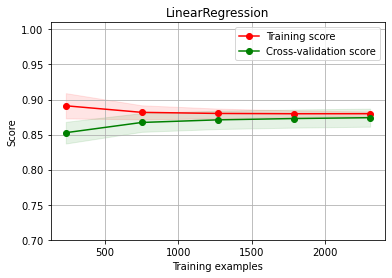

In [43]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = train_data2[test_data2.columns].values
y = train_data2['target'].values


title = "LinearRegression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = model_selection.ShuffleSplit(X.shape[0], test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv)

### 验证曲线

Automatically created module for IPython interactive environment


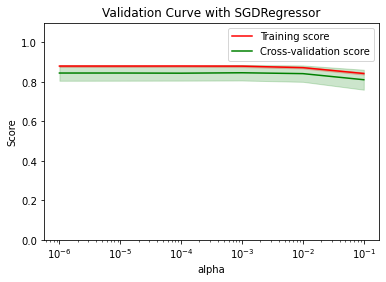

In [44]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
# max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1'), X, y, param_name="alpha", param_range=param_range,
    cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()